In [1]:
import pandas
import boto3

In [16]:
def get_data():
    s3 = boto3.resource('s3')
    bucket = s3.Bucket('files.sucho.org')
    for o in bucket.objects.all():
        yield {'size': o.size, 'date': o.last_modified.date()}
        
df = pandas.DataFrame(get_data())
df = df.groupby('date').sum()
df

,size
date,
2022-03-08,1016987661887
2022-03-10,29434192374
2022-03-11,4923712518
2022-03-12,3059372814
2022-03-13,495656633076
...,...
2022-06-20,81973774956
2022-06-21,81818476
2022-06-22,33705823705


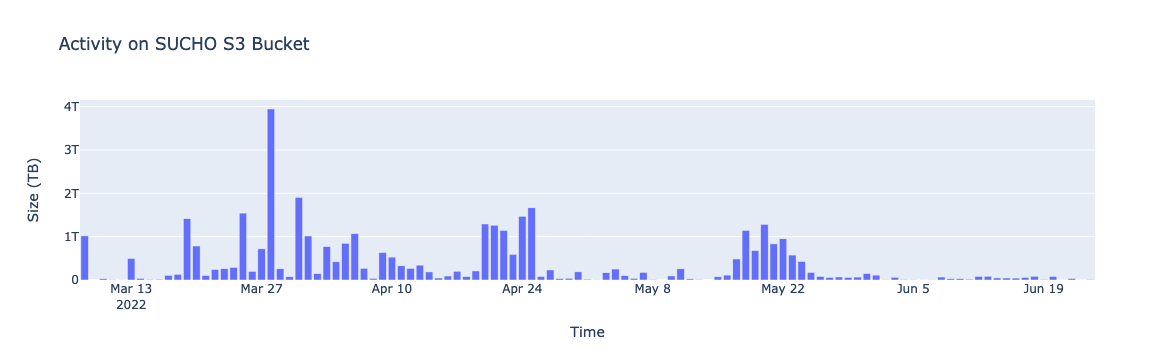

In [24]:
import plotly.express as xp

xp.bar(df, x=df.index, y='size', labels={'size': 'Size (TB)', 'date': 'Time'}, title='Activity on SUCHO S3 Bucket')

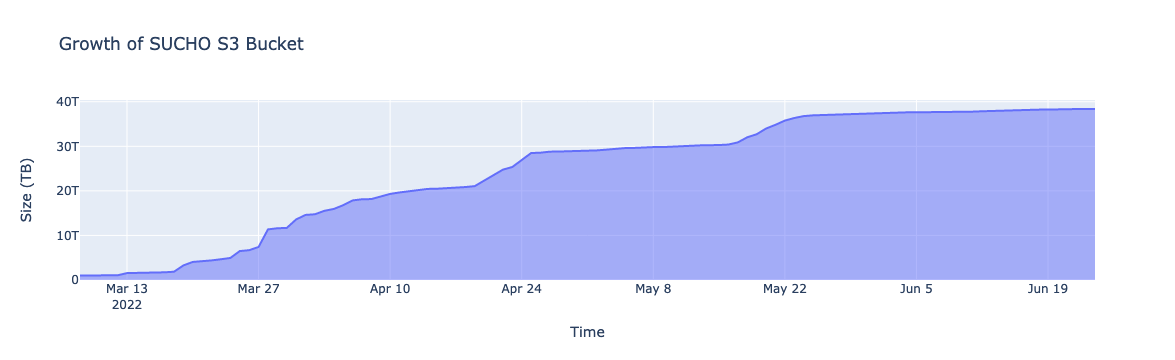

In [31]:
df2 = df.rolling(min_periods=1, window=len(df)).sum()
xp.area(df2, x=df2.index, y='size', labels={'size': 'Size (TB)', 'date': 'Time'}, title='Growth of SUCHO S3 Bucket')